In [9]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.signal import find_peaks
import plotly.io as pio
import plotly.express as px
from functools import reduce
    
    # Method that gets the total of your state
def calculate_total_cases_by_day(df):
        """Calculates the total COVID-19 cases for each day across all counties and returns a new DataFrame."""
        # Select only the date columns (assuming they start from the 5th column)
        date_columns = df.columns[4:]  # Adjust index as necessary
    
        # Calculate the sum for each column
        column_sums = df[date_columns].sum()
    
        # Create a new DataFrame with column names and sums
        new_df = pd.DataFrame({
        'Column': column_sums.index,
        'Sum': column_sums.values})
    
        # Display the DataFrame
        print(new_df)
        new_df.to_csv('case_sum.csv')
        return new_df
    
    
    # Method to calculate the total by day (this will be used to return total cases)
def calculate_total_by_day(df):
        # Return DataFrame with 'Column' (dates) and 'Sum' (total cases)
        return df[['Column', 'Sum']].copy()
    
    # Method to calculate daily new cases
def calculate_daily_new_cases(df):
        # Calculate the difference between consecutive days to find new cases
        df['New Cases'] = df['Sum'].diff().fillna(0)  # Fill the first value with 0 for the initial day
    
        # Convert 'New Cases' to integer
        df['New Cases'] = df['New Cases'].astype(int)
    
        # Create a new DataFrame to retain just the dates and new cases
        new_cases_df = df[['Column', 'New Cases']].copy()
        
        return new_cases_df
        
    #calculate the mean, median and mode
def calculate_weekly_statistics(df):
        """Calculates the mean, median, and mode of daily new cases for each week and returns a new DataFrame."""
        
        # Ensure 'Column' is treated as dates
        df['Column'] = pd.to_datetime(df['Column'])
        
        # Add a new column to indicate the week number (using ISO calendar week)
        df['Week'] = df['Column'].dt.to_period('W')
        
        # Ensure that 'New Cases' has no negative values
        df['New Cases'] = df['New Cases'].clip(lower=0)
        
        # Group by the 'Week' column and calculate the mean, median, and mode of 'New Cases'
        weekly_stats_df = df.groupby('Week').agg(
            Mean=('New Cases', 'mean'),
            Median=('New Cases', 'median'),
            Mode=('New Cases', lambda x: x.mode()[0] if not x.mode().empty else 0)  # Handle empty mode cases
        ).reset_index()
        
        return weekly_stats_df

In [45]:
#read file
covid_cases_usa = pd.read_csv('covid_confirmed_usafacts.csv')
#call method for sum
sum_covid_cases_usa= calculate_total_cases_by_day(covid_cases_usa)


          Column       Sum
0     2020-01-22       723
1     2020-01-23       734
2     2020-01-24       741
3     2020-01-25       751
4     2020-01-26       759
...          ...       ...
1260  2023-07-19  99593865
1261  2023-07-20  99595974
1262  2023-07-21  99596741
1263  2023-07-22  99596741
1264  2023-07-23  99596741

[1265 rows x 2 columns]


In [46]:
sum_covid_cases_usa['Column'] = pd.to_datetime(sum_covid_cases_usa['Column'])
sum_total_covid_cases_usa = calculate_total_by_day(sum_covid_cases_usa)
#call method for new cases
daily_new_cases_usa = calculate_daily_new_cases(sum_covid_cases_usa)
print(daily_new_cases_usa)


         Column  New Cases
0    2020-01-22          0
1    2020-01-23         11
2    2020-01-24          7
3    2020-01-25         10
4    2020-01-26          8
...         ...        ...
1260 2023-07-19       4993
1261 2023-07-20       2109
1262 2023-07-21        767
1263 2023-07-22          0
1264 2023-07-23          0

[1265 rows x 2 columns]


In [68]:
#call method for weekly stats
weekly_cases_stats_usa = calculate_weekly_statistics(daily_new_cases_usa)
print(weekly_cases_stats_usa)
weekly_cases_stats_usa.to_csv('weekly_cases_usa.csv')
case=weekly_cases_stats_usa.rename(columns={'Mean':'Mean_Cases', 'Median': 'Median_Cases', 'Mode':'Mode_Cases'})

                      Week         Mean  Median  Mode
0    2020-01-20/2020-01-26     7.200000     8.0     0
1    2020-01-27/2020-02-02    10.142857     7.0     0
2    2020-02-03/2020-02-09     9.000000     6.0     4
3    2020-02-10/2020-02-16     7.000000     7.0     4
4    2020-02-17/2020-02-23    14.571429    15.0    15
..                     ...          ...     ...   ...
177  2023-06-19/2023-06-25  3765.285714  3014.0   439
178  2023-06-26/2023-07-02  2545.000000   931.0    66
179  2023-07-03/2023-07-09  3461.857143  1034.0   536
180  2023-07-10/2023-07-16  2860.571429   922.0   422
181  2023-07-17/2023-07-23  1659.857143   767.0     0

[182 rows x 4 columns]


In [70]:
#read file
covid_deaths_usa = pd.read_csv('covid_deaths_usafacts.csv')
#call method for sum
sum_covid_deaths_usa= calculate_total_cases_by_day(covid_deaths_usa)


          Column      Sum
0     2020-01-22        1
1     2020-01-23        1
2     2020-01-24        1
3     2020-01-25        1
4     2020-01-26        1
...          ...      ...
1260  2023-07-19  1104221
1261  2023-07-20  1103982
1262  2023-07-21  1104000
1263  2023-07-22  1104000
1264  2023-07-23  1104000

[1265 rows x 2 columns]


In [71]:
sum_covid_deaths_usa['Column'] = pd.to_datetime(sum_covid_deaths_usa['Column'])
sum_total_covid_deaths_usa = calculate_total_by_day(sum_covid_deaths_usa)
#call method for new cases
daily_new_deaths_usa = calculate_daily_new_cases(sum_covid_deaths_usa)
print(daily_new_deaths_usa.head())
daily_new_deaths_usa.to_csv('death_new.csv')

      Column  New Cases
0 2020-01-22          0
1 2020-01-23          0
2 2020-01-24          0
3 2020-01-25          0
4 2020-01-26          0


In [74]:
#call method for weekly stats
weekly_deaths_stats_usa = calculate_weekly_statistics(daily_new_deaths_usa)
print(weekly_deaths_stats_usa)
weekly_deaths_stats_usa.to_csv('weekly_deaths_usa.csv')
death = weekly_deaths_stats_usa.rename(columns={'Mean':'Mean_Deaths', 'Median': 'Median_Deaths', 'Mode':'Mode_Deaths'})

                      Week       Mean  Median  Mode
0    2020-01-20/2020-01-26   0.000000     0.0     0
1    2020-01-27/2020-02-02   0.000000     0.0     0
2    2020-02-03/2020-02-09   0.142857     0.0     0
3    2020-02-10/2020-02-16   0.000000     0.0     0
4    2020-02-17/2020-02-23   0.142857     0.0     0
..                     ...        ...     ...   ...
177  2023-06-19/2023-06-25  48.714286    19.0     1
178  2023-06-26/2023-07-02  38.571429    33.0     2
179  2023-07-03/2023-07-09  34.571429     4.0     0
180  2023-07-10/2023-07-16  19.857143     0.0     0
181  2023-07-17/2023-07-23  10.428571     0.0     0

[182 rows x 4 columns]


In [82]:
covid_data=pd.merge(case, death, on='Week')
covid_data

,Week,Mean_Cases,Median_Cases,Mode_Cases,Mean_Deaths,Median_Deaths,Mode_Deaths
0,2020-01-20/2020-01-26,7.200000,8.0,0,0.000000,0.0,0
1,2020-01-27/2020-02-02,10.142857,7.0,0,0.000000,0.0,0
2,2020-02-03/2020-02-09,9.000000,6.0,4,0.142857,0.0,0
3,2020-02-10/2020-02-16,7.000000,7.0,4,0.000000,0.0,0
4,2020-02-17/2020-02-23,14.571429,15.0,15,0.142857,0.0,0
...,...,...,...,...,...,...,...
177,2023-06-19/2023-06-25,3765.285714,3014.0,439,48.714286,19.0,1
178,2023-06-26/2023-07-02,2545.000000,931.0,66,38.571429,33.0,2
179,2023-07-03/2023-07-09,3461.857143,1034.0,536,34.571429,4.0,0
180,2023-07-10/2023-07-16,2860.571429,922.0,422,19.857143,0.0,0


In [285]:
super_df=pd.read_csv('super_covid_data.csv')
nevada_data = super_df[super_df['State'] == 'NV']


"""Calculates the total COVID-19 cases for each day across all counties and returns a new DataFrame."""

date_columns_case = nevada_data.loc[:,'2020-01-22_confirmed':'2023-07-23_confirmed']  
date_columns_death = nevada_data.loc[:,'2020-01-22_deaths':'2023-07-23_deaths']  

column_sums_case = date_columns_case.sum()
column_sums_death = date_columns_death.sum()

new_df = pd.DataFrame({
        'Day': column_sums_case.index,
        'Sum_Cases': column_sums_case.values,
        'Sum_Deaths' :column_sums_death.values })
new_df.to_csv('new_df.csv')
new_df.Day = new_df.Day.str.replace('_confirmed', '', regex=True).str.strip()
new_df['Day'] = pd.to_datetime(new_df['Day'])
print(new_df)
# Calculate the difference between consecutive days to find new cases
new_df['New Cases'] = new_df['Sum_Cases'].diff().fillna(0)  # Fill the first value with 0 for the initial day
new_df['New Death'] = new_df['Sum_Deaths'].diff().fillna(0)
                                                         
# Convert 'New Cases' to integer
new_df['New Cases'] = new_df['New Cases'].astype(int)
new_df['New Death'] = new_df['New Death'].astype(int)    
# Create a new DataFrame to retain just the dates and new cases
new_cases_df = new_df[['Day', 'New Cases', 'New Death']].copy()
print(new_cases_df)
# add the County Name column back
pop_sum = nevada_data['population'].sum()
print(pop_sum)
#column_names = nevada_data.columns
#print(column_names)
#column_to_import = nevada_data[['population']]
# reset indexes for proper alignment

#column_to_import.reset_index(drop=True, inplace=True)

# add the County Name column back to the fixed DataFrame
#new_cases_df['population'] = column_to_import
#new_cases_df


            Day  Sum_Cases  Sum_Deaths
0    2020-01-22        0.0         0.0
1    2020-01-23        0.0         0.0
2    2020-01-24        0.0         0.0
3    2020-01-25        0.0         0.0
4    2020-01-26        0.0         0.0
...         ...        ...         ...
1260 2023-07-19   891729.0     12080.0
1261 2023-07-20   892252.0     12084.0
1262 2023-07-21   892252.0     12084.0
1263 2023-07-22   892252.0     12084.0
1264 2023-07-23   892252.0     12084.0

[1265 rows x 3 columns]
            Day  New Cases  New Death
0    2020-01-22          0          0
1    2020-01-23          0          0
2    2020-01-24          0          0
3    2020-01-25          0          0
4    2020-01-26          0          0
...         ...        ...        ...
1260 2023-07-19          0          0
1261 2023-07-20        523          4
1262 2023-07-21          0          0
1263 2023-07-22          0          0
1264 2023-07-23          0          0

[1265 rows x 3 columns]
3080156.0


In [203]:
# Create a new DataFrame to retain just the dates and new cases
new_cases_df = new_df[['Day', 'New Cases', 'New Death']].copy()

# Add a new column to indicate the week number (using ISO calendar week)
new_cases_df['Week'] = new_cases_df['Day'].dt.to_period('W')

# Ensure that 'New Cases' has no negative values
new_cases_df['New Cases'] = new_cases_df['New Cases'].clip(lower=0)

# Group by the 'Week' column and calculate the mean, median, and mode of 'New Cases'
weekly_stats_df = new_cases_df.groupby('Week').agg(
    Mean_cases=('New Cases', 'mean'),
    Median_cases=('New Cases', 'median'),
    Mode_cases=('New Cases', lambda x: x.mode()[0] if not x.mode().empty else 0),
    Mean_deaths=('New Death', 'mean'),
    Median_deaths=('New Death', 'median'),
    Mode_deaths=('New Cases', lambda x: x.mode()[0] if not x.mode().empty else 0)# Handle empty mode cases
).reset_index()
weekly_stats_df
        

,Week,Mean_cases,Median_cases,Mode_cases,Mean_deaths,Median_deaths,Mode_deaths
0,2020-01-20/2020-01-26,0.000000,0.0,0,0.000000,0.0,0
1,2020-01-27/2020-02-02,0.000000,0.0,0,0.000000,0.0,0
2,2020-02-03/2020-02-09,0.000000,0.0,0,0.000000,0.0,0
3,2020-02-10/2020-02-16,0.000000,0.0,0,0.000000,0.0,0
4,2020-02-17/2020-02-23,0.000000,0.0,0,0.000000,0.0,0
...,...,...,...,...,...,...,...
177,2023-06-19/2023-06-25,44.428571,0.0,0,1.142857,0.0,0
178,2023-06-26/2023-07-02,57.571429,0.0,0,0.285714,0.0,0
179,2023-07-03/2023-07-09,62.714286,0.0,0,0.857143,0.0,0
180,2023-07-10/2023-07-16,174.142857,0.0,0,0.714286,0.0,0


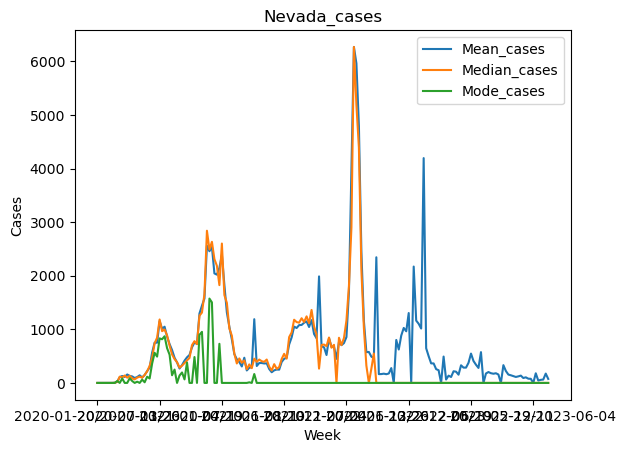

In [281]:
describe = {
    'Mean_cases': 'blue',
    'Median_cases': 'orange',
    'Mode_cases': 'red',
    'Mean_deaths': 'green',
    'Median_deaths': 'yellow',
    'Mode_deaths': 'purple'
}


weekly_stats_df.plot(x='Week', y=['Mean_cases', 'Median_cases','Mode_cases' ], title='Nevada_cases')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.show()




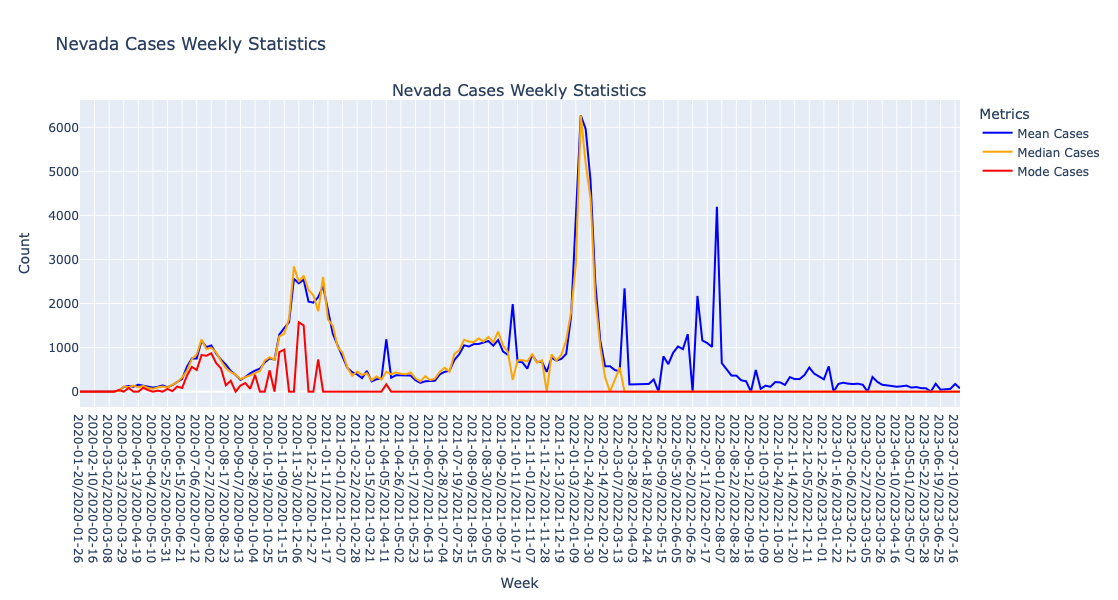

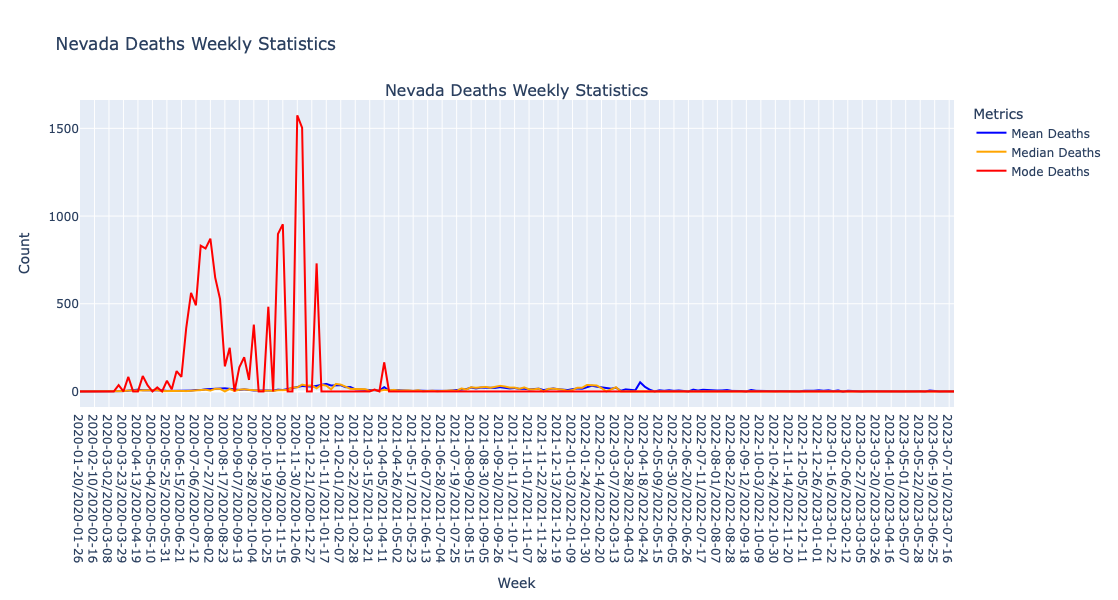

In [279]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define colors for each metric
describe = {
    'Mean_cases': 'blue',
    'Median_cases': 'orange',
    'Mode_cases': 'red',
    'Mean_deaths': 'blue',
    'Median_deaths': 'orange',
    'Mode_deaths': 'red'
}

# Convert 'Week' column to string for Plotly compatibility
weekly_stats_df['Week'] = weekly_stats_df['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Nevada Cases Weekly Statistics"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Mean_cases'], 
        mode='lines', 
        name='Mean Cases',
        line=dict(color=describe['Mean_cases'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Median_cases'], 
        mode='lines', 
        name='Median Cases',
        line=dict(color=describe['Median_cases'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Mode_cases'], 
        mode='lines',  
        name='Mode Cases',
        line=dict(color=describe['Mode_cases'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Nevada Cases Weekly Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

# Convert 'Week' column to string for Plotly compatibility
weekly_stats_df['Week'] = weekly_stats_df['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Nevada Deaths Weekly Statistics"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Mean_deaths'], 
        mode='lines', 
        name='Mean Deaths',
        line=dict(color=describe['Mean_deaths'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Median_deaths'], 
        mode='lines', 
        name='Median Deaths',
        line=dict(color=describe['Median_deaths'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df['Week'], 
        y=weekly_stats_df['Mode_deaths'], 
        mode='lines',  
        name='Mode Deaths',
        line=dict(color=describe['Mode_deaths'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Nevada Deaths Weekly Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()




In [317]:
# Normalize the cases and deaths per 100,000 population
new_df['cases_per_100k'] = (new_df['New Cases'] / pop_sum) * 100000
new_df['deaths_per_100k'] = (new_df['New Death'] / pop_sum) * 100000

# Create a new DataFrame with selected columns
new_cases_df = new_df[['Day', 'New Cases', 'New Death', 'cases_per_100k', 'deaths_per_100k']].copy()

# Add a column for the week number using ISO calendar weeks
new_cases_df['Week'] = new_cases_df['Day'].dt.to_period('W')

# Ensure that 'New Cases' has no negative values
new_cases_df['New Cases'] = new_cases_df['New Cases'].clip(lower=0)

# Group by 'Week' and calculate the desired statistics
weekly_stats_df_per_100k = new_cases_df.groupby('Week').agg(
    Mean_cases_per_100k=('cases_per_100k', 'mean'),
    Median_cases_per_100k=('cases_per_100k', 'median'),
    Mode_cases_per_100k=('cases_per_100k', lambda x: x.mode()[0] if not x.mode().empty else 0),
    Mean_deaths_per_100k=('deaths_per_100k', 'mean'),
    Median_deaths_per_100k=('deaths_per_100k', 'median'),
    Mode_deaths_per_100k=('deaths_per_100k', lambda x: x.mode()[0] if not x.mode().empty else 0)
).reset_index()

print(weekly_stats_df_per_100k)



                      Week  Mean_cases_per_100k  Median_cases_per_100k  \
0    2020-01-20/2020-01-26             0.000000                    0.0   
1    2020-01-27/2020-02-02             0.000000                    0.0   
2    2020-02-03/2020-02-09             0.000000                    0.0   
3    2020-02-10/2020-02-16             0.000000                    0.0   
4    2020-02-17/2020-02-23             0.000000                    0.0   
..                     ...                  ...                    ...   
177  2023-06-19/2023-06-25             1.442413                    0.0   
178  2023-06-26/2023-07-02             1.869108                    0.0   
179  2023-07-03/2023-07-09             2.036075                    0.0   
180  2023-07-10/2023-07-16             5.653703                    0.0   
181  2023-07-17/2023-07-23             2.425666                    0.0   

     Mode_cases_per_100k  Mean_deaths_per_100k  Median_deaths_per_100k  \
0                    0.0             

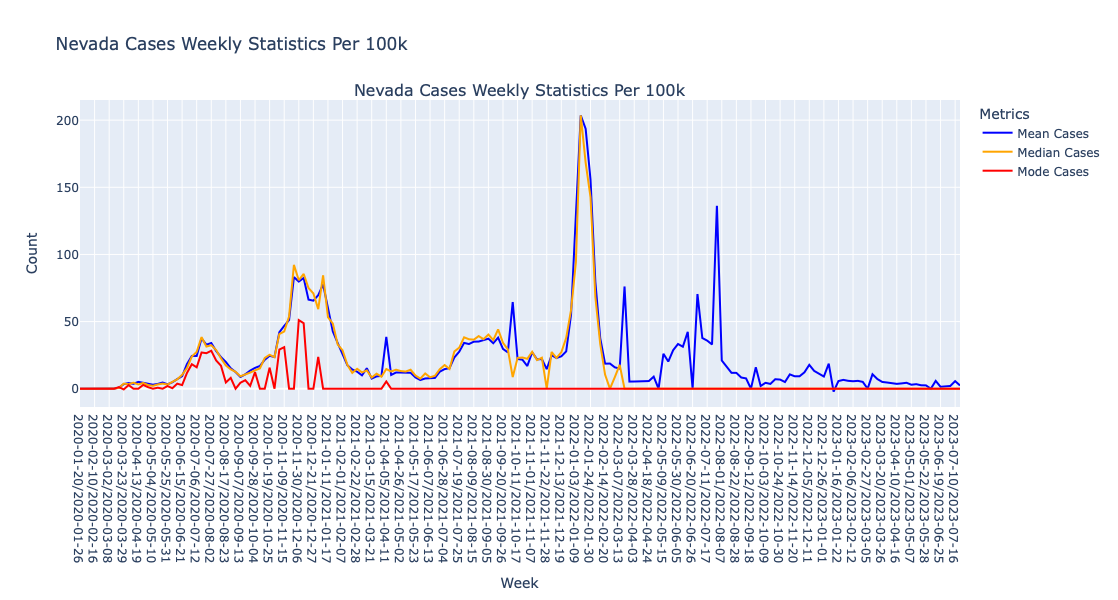

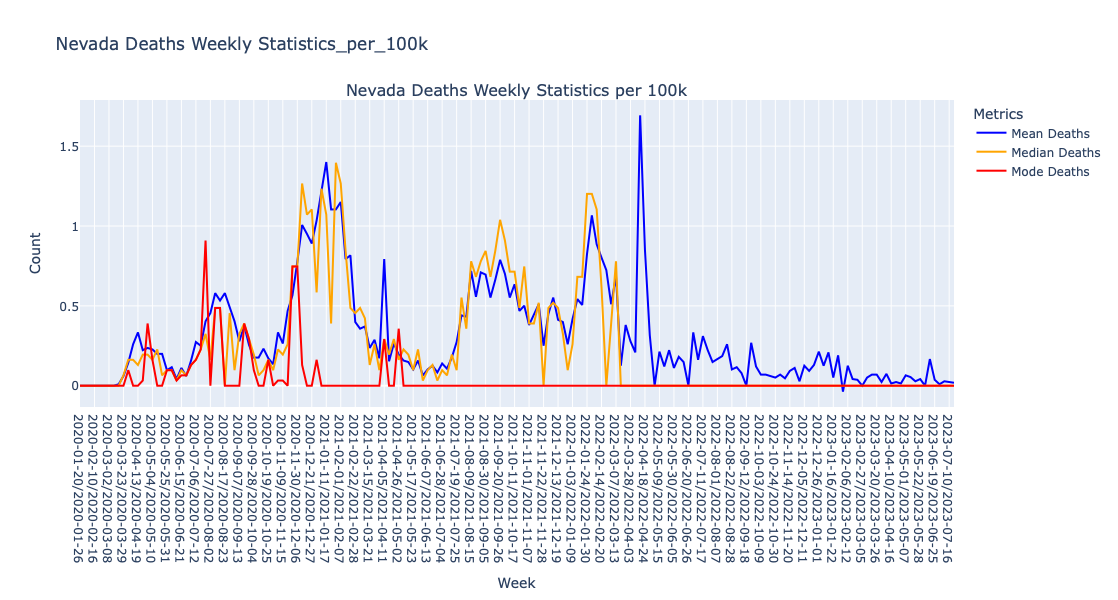

In [323]:

# Define colors for each metric
describe = {
    'Mean_cases_per_100k': 'blue',
    'Median_cases_per_100k': 'orange',
    'Mode_cases_per_100k': 'red',
    'Mean_deaths_per_100k': 'blue',
    'Median_deaths_per_100k': 'orange',
    'Mode_deaths_per_100k': 'red'
}

# Convert 'Week' column to string for Plotly compatibility
weekly_stats_df_per_100k['Week'] = weekly_stats_df_per_100k['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Nevada Cases Weekly Statistics Per 100k"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Mean_cases_per_100k'], 
        mode='lines', 
        name='Mean Cases',
        line=dict(color=describe['Mean_cases_per_100k'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Median_cases_per_100k'], 
        mode='lines', 
        name='Median Cases',
        line=dict(color=describe['Median_cases_per_100k'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Mode_cases_per_100k'], 
        mode='lines',  
        name='Mode Cases',
        line=dict(color=describe['Mode_cases_per_100k'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Nevada Cases Weekly Statistics Per 100k",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

# Convert 'Week' column to string for Plotly compatibility
weekly_stats_df_per_100k['Week'] =weekly_stats_df_per_100k['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Nevada Deaths Weekly Statistics per 100k"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Mean_deaths_per_100k'], 
        mode='lines', 
        name='Mean Deaths',
        line=dict(color=describe['Mean_deaths_per_100k'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Median_deaths_per_100k'], 
        mode='lines', 
        name='Median Deaths',
        line=dict(color=describe['Median_deaths_per_100k'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_stats_df_per_100k['Week'], 
        y=weekly_stats_df_per_100k['Mode_deaths_per_100k'], 
        mode='lines',  
        name='Mode Deaths',
        line=dict(color=describe['Mode_deaths_per_100k'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Nevada Deaths Weekly Statistics_per_100k",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

In [11]:


def calculate_weekly_covid_stats(dataframe, state):
    """
    Filters data for a specified state and calculates weekly statistics for COVID-19 new cases and new deaths.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame containing COVID-19 data.
        state (str): The state for which to filter data.
    
    Returns:
        pd.DataFrame: A DataFrame containing weekly mean, median, and mode of new cases and new deaths.
    """
    # Filter data for the specified state
    state_data = dataframe[dataframe['State'] == state]

    # Calculate daily sums for cases and deaths
    date_columns_case = state_data.loc[:, '2020-01-22_confirmed':'2023-07-23_confirmed']
    date_columns_death = state_data.loc[:, '2020-01-22_deaths':'2023-07-23_deaths']

    column_sums_case = date_columns_case.sum()
    column_sums_death = date_columns_death.sum()

    # Create a new DataFrame for daily totals
    new_df = pd.DataFrame({
        'Day': column_sums_case.index,
        'Sum_Cases': column_sums_case.values,
        'Sum_Deaths': column_sums_death.values
    })

    # Clean up and format the 'Day' column
    new_df['Day'] = new_df['Day'].str.replace('_confirmed', '', regex=True).str.strip()
    new_df['Day'] = pd.to_datetime(new_df['Day'])

    # Calculate new daily cases and deaths
    new_df['New Cases'] = new_df['Sum_Cases'].diff().fillna(0).astype(int)
    new_df['New Death'] = new_df['Sum_Deaths'].diff().fillna(0).astype(int)

    # Create a new DataFrame with only relevant columns
    new_cases_df = new_df[['Day', 'New Cases', 'New Death']].copy()

    # Add a new column to indicate the week number
    new_cases_df['Week'] = new_cases_df['Day'].dt.to_period('W')

    # Ensure that 'New Cases' and 'New Death' have no negative values
    new_cases_df['New Cases'] = new_cases_df['New Cases'].clip(lower=0)
    new_cases_df['New Death'] = new_cases_df['New Death'].clip(lower=0)

    # Group by the 'Week' column and calculate weekly statistics
    weekly_stats_df = new_cases_df.groupby('Week').agg(
        Mean_cases=('New Cases', 'mean'),
        Median_cases=('New Cases', 'median'),
        Mode_cases=('New Cases', lambda x: x.mode()[0] if not x.mode().empty else 0),
        Mean_deaths=('New Death', 'mean'),
        Median_deaths=('New Death', 'median'),
        Mode_deaths=('New Death', lambda x: x.mode()[0] if not x.mode().empty else 0)
    ).reset_index()

    return weekly_stats_df

# Example usage
super_df = pd.read_csv('super_covid_data.csv')
weekly_stats_nv = calculate_weekly_covid_stats(super_df, 'NV')
weekly_stats_nv.columns = weekly_stats_nv.columns.str.replace('es', 'es_Nv', regex=False).str.strip()
weekly_stats_nv.columns = weekly_stats_nv.columns.str.replace('hs', 'hs_NV', regex=False).str.strip()
print(weekly_stats_nv)


weekly_stats_id = calculate_weekly_covid_stats(super_df, 'ID')
weekly_stats_id.columns = weekly_stats_id.columns.str.replace('es', 'es_ID', regex=False).str.strip()
weekly_stats_id.columns = weekly_stats_id.columns.str.replace('hs', 'hs_ID', regex=False).str.strip()
print(weekly_stats_id)

weekly_stats_ms = calculate_weekly_covid_stats(super_df, 'MS')
weekly_stats_ms.columns = weekly_stats_ms.columns.str.replace('es', 'es_MS', regex=False).str.strip()
weekly_stats_ms.columns = weekly_stats_ms.columns.str.replace('hs', 'hs_MS', regex=False).str.strip()
print(weekly_stats_ms)

weekly_stats_nm = calculate_weekly_covid_stats(super_df, 'NM')
weekly_stats_nm.columns = weekly_stats_nm.columns.str.replace('es', 'es_NM', regex=False).str.strip()
weekly_stats_nm.columns = weekly_stats_nm.columns.str.replace('hs', 'hs_NM', regex=False).str.strip()
print(weekly_stats_nm)

weekly_stats_ks = calculate_weekly_covid_stats(super_df, 'KS')
weekly_stats_ks.columns = weekly_stats_ks.columns.str.replace('es', 'es_KS', regex=False).str.strip()
weekly_stats_ks.columns = weekly_stats_ks.columns.str.replace('hs', 'hs_KS', regex=False).str.strip()
print(weekly_stats_ks)


#define list of DataFrames
chosen_states = [weekly_stats_nv, weekly_stats_id, weekly_stats_ms, weekly_stats_nm, weekly_stats_ks]

#merge all DataFrames into one
chosen_states_stats= reduce(lambda  left,right: pd.merge(left,right,on=['Week']
                                            ), chosen_states )


                      Week  Mean_cases_Nv  Median_cases_Nv  Mode_cases_Nv  \
0    2020-01-20/2020-01-26       0.000000              0.0              0   
1    2020-01-27/2020-02-02       0.000000              0.0              0   
2    2020-02-03/2020-02-09       0.000000              0.0              0   
3    2020-02-10/2020-02-16       0.000000              0.0              0   
4    2020-02-17/2020-02-23       0.000000              0.0              0   
..                     ...            ...              ...            ...   
177  2023-06-19/2023-06-25      44.428571              0.0              0   
178  2023-06-26/2023-07-02      57.571429              0.0              0   
179  2023-07-03/2023-07-09      62.714286              0.0              0   
180  2023-07-10/2023-07-16     174.142857              0.0              0   
181  2023-07-17/2023-07-23      74.714286              0.0              0   

     Mean_deaths_NV  Median_deaths_NV  Mode_deaths_NV  
0          0.000000

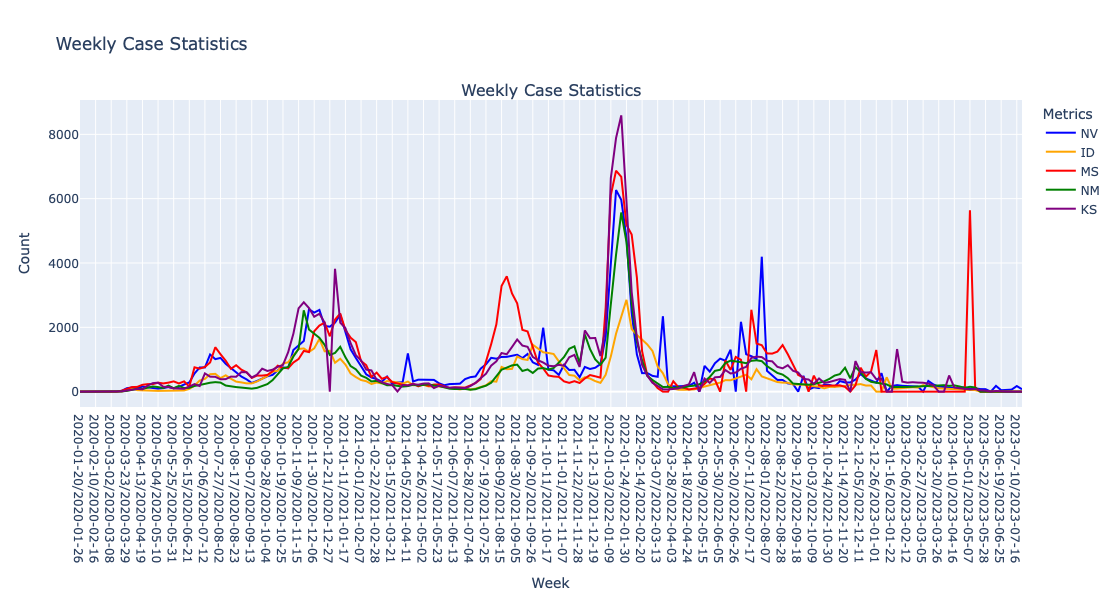

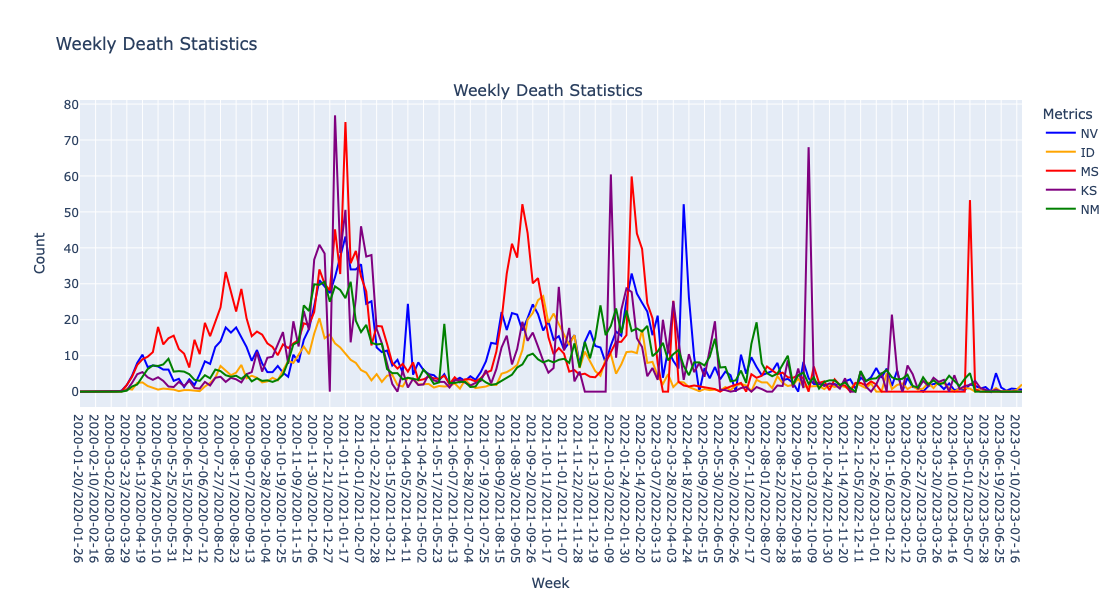

In [21]:

# Define colors for each metric
State = {
    'NV': 'blue',
    'ID': 'orange',
    'MS': 'red',
    'NM': 'green',
    'KS': 'purple',
}

# Convert 'Week' column to string for Plotly compatibility
chosen_states_stats['Week'] = chosen_states_stats['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Weekly Case Statistics"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_cases_Nv'], 
        mode='lines', 
        name='NV',
        line=dict(color=State['NV'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_cases_ID'], 
        mode='lines', 
        name='ID',
        line=dict(color=State['ID'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_cases_MS'], 
        mode='lines',  
        name='MS',
        line=dict(color=State['MS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_cases_NM'], 
        mode='lines',  
        name='NM',
        line=dict(color=State['NM'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_cases_KS'], 
        mode='lines',  
        name='KS',
        line=dict(color=State['KS'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Weekly Case Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

# Convert 'Week' column to string for Plotly compatibility
chosen_states_stats['Week'] =chosen_states_stats['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Weekly Death Statistics "])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_deaths_NV'], 
        mode='lines', 
        name='NV',
        line=dict(color=State['NV'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_deaths_ID'], 
        mode='lines', 
        name='ID',
        line=dict(color=State['ID'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_deaths_MS'], 
        mode='lines',  
        name='MS',
        line=dict(color=State['MS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_deaths_KS'], 
        mode='lines',  
        name='KS',
        line=dict(color=State['KS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats['Week'], 
        y=chosen_states_stats['Mean_deaths_NM'], 
        mode='lines',  
        name='NM',
        line=dict(color=State['NM'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Weekly Death Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

In [47]:
def calculate_weekly_covid_stats_per_100k(dataframe, state):
    """
    Filters data for a specified state and calculates weekly statistics for COVID-19 new cases and new deaths.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame containing COVID-19 data.
        state (str): The state for which to filter data.
    
    Returns:
        pd.DataFrame: A DataFrame containing weekly mean, median, and mode of new cases and new deaths.
    """
    # Filter data for the specified state
    state_data = dataframe[dataframe['State'] == state]
    
    # Calculate total population for the state
    population_sum = state_data['population'].sum()
    
    # Calculate daily sums for cases and deaths
    date_columns_case = state_data.loc[:, '2020-01-22_confirmed':'2023-07-23_confirmed']
    date_columns_death = state_data.loc[:, '2020-01-22_deaths':'2023-07-23_deaths']

    column_sums_case = date_columns_case.sum()
    column_sums_death = date_columns_death.sum()

    # Create a new DataFrame for daily totals
    new_df = pd.DataFrame({
        'Day': column_sums_case.index,
        'Sum_Cases': column_sums_case.values,
        'Sum_Deaths': column_sums_death.values
    })

    # Clean up and format the 'Day' column
    new_df['Day'] = new_df['Day'].str.replace('_confirmed', '', regex=True).str.strip()
    new_df['Day'] = pd.to_datetime(new_df['Day'])

    # Calculate new daily cases and deaths
    new_df['New Cases'] = new_df['Sum_Cases'].diff().fillna(0).astype(int)
    new_df['New Death'] = new_df['Sum_Deaths'].diff().fillna(0).astype(int)

    # Create a new DataFrame with only relevant columns
    new_cases_df = new_df[['Day', 'New Cases', 'New Death']].copy()

    # Normalize cases and deaths per 100,000 population
    new_df['cases_per_100k'] = (new_df['New Cases'] / population_sum) * 100000
    new_df['deaths_per_100k'] = (new_df['New Death'] / population_sum) * 100000

    new_cases_df = new_df[['Day', 'New Cases', 'New Death', 'cases_per_100k', 'deaths_per_100k']].copy()
    
    # Add a new column to indicate the week number
    new_cases_df['Week'] = new_cases_df['Day'].dt.to_period('W')

    # Ensure that 'New Cases' and 'New Death' have no negative values
    new_cases_df['New Cases'] = new_cases_df['New Cases'].clip(lower=0)
    new_cases_df['New Death'] = new_cases_df['New Death'].clip(lower=0)

    # Group by the 'Week' column and calculate weekly statistics
    weekly_stats_df = new_cases_df.groupby('Week').agg(
        Mean_cases_per_100k=('cases_per_100k', 'mean'),
        Median_cases_per_100k=('cases_per_100k', 'median'),
        Mode_cases_per_100k=('cases_per_100k', lambda x: x.mode()[0] if not x.mode().empty else 0),
        Mean_deaths_per_100k=('deaths_per_100k', 'mean'),
        Median_deaths_per_100k=('deaths_per_100k', 'median'),
        Mode_deaths_per_100k=('deaths_per_100k', lambda x: x.mode()[0] if not x.mode().empty else 0)
    ).reset_index()

    return weekly_stats_df


super_df = pd.read_csv('super_covid_data.csv')
weekly_stats_nv_per_100k = calculate_weekly_covid_stats_per_100k(super_df, 'NV')
weekly_stats_nv_per_100k
weekly_stats_nv_per_100k.columns = weekly_stats_nv_per_100k.columns.str.replace('0k', '0k_NV', regex=False).str.strip()
print(weekly_stats_nv_per_100k)


weekly_stats_id_per_100k = calculate_weekly_covid_stats_per_100k(super_df, 'ID')
weekly_stats_id_per_100k.columns = weekly_stats_id_per_100k.columns.str.replace('0k', '0k_ID', regex=False).str.strip()
print(weekly_stats_id_per_100k)

weekly_stats_ms_per_100k = calculate_weekly_covid_stats_per_100k(super_df, 'MS')
weekly_stats_ms_per_100k.columns = weekly_stats_ms_per_100k.columns.str.replace('0k', '0k_MS', regex=False).str.strip()
print(weekly_stats_ms_per_100k)

weekly_stats_nm_per_100k = calculate_weekly_covid_stats_per_100k(super_df, 'NM')
weekly_stats_nm_per_100k.columns = weekly_stats_nm_per_100k.columns.str.replace('0k', '0k_NM', regex=False).str.strip()

print(weekly_stats_nm_per_100k)

weekly_stats_ks_per_100k = calculate_weekly_covid_stats_per_100k(super_df, 'KS')
weekly_stats_ks_per_100k.columns = weekly_stats_ks_per_100k.columns.str.replace('0k', '0k_KS', regex=False).str.strip()
print(weekly_stats_ks_per_100k)


#define list of DataFrames
chosen_states_per_100k = [weekly_stats_nv_per_100k, weekly_stats_id_per_100k, weekly_stats_ms_per_100k, weekly_stats_nm_per_100k, weekly_stats_ks_per_100k]

#merge all DataFrames into one
chosen_states_stats_per_100k= reduce(lambda  left,right: pd.merge(left,right,on=['Week']
                                            ), chosen_states_per_100k )
chosen_states_stats_per_100k


                      Week  Mean_cases_per_100k_NV  Median_cases_per_100k_NV  \
0    2020-01-20/2020-01-26                0.000000                       0.0   
1    2020-01-27/2020-02-02                0.000000                       0.0   
2    2020-02-03/2020-02-09                0.000000                       0.0   
3    2020-02-10/2020-02-16                0.000000                       0.0   
4    2020-02-17/2020-02-23                0.000000                       0.0   
..                     ...                     ...                       ...   
177  2023-06-19/2023-06-25                1.442413                       0.0   
178  2023-06-26/2023-07-02                1.869108                       0.0   
179  2023-07-03/2023-07-09                2.036075                       0.0   
180  2023-07-10/2023-07-16                5.653703                       0.0   
181  2023-07-17/2023-07-23                2.425666                       0.0   

     Mode_cases_per_100k_NV  Mean_death

,Week,Mean_cases_per_100k_NV,Median_cases_per_100k_NV,Mode_cases_per_100k_NV,Mean_deaths_per_100k_NV,Median_deaths_per_100k_NV,Mode_deaths_per_100k_NV,Mean_cases_per_100k_ID,Median_cases_per_100k_ID,Mode_cases_per_100k_ID,...,Mode_cases_per_100k_NM,Mean_deaths_per_100k_NM,Median_deaths_per_100k_NM,Mode_deaths_per_100k_NM,Mean_cases_per_100k_KS,Median_cases_per_100k_KS,Mode_cases_per_100k_KS,Mean_deaths_per_100k_KS,Median_deaths_per_100k_KS,Mode_deaths_per_100k_KS
0,2020-01-20/2020-01-26,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27/2020-02-02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-03/2020-02-09,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-10/2020-02-16,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-17/2020-02-23,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2023-06-19/2023-06-25,1.442413,0.0,0.0,0.037104,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,2023-06-26/2023-07-02,1.869108,0.0,0.0,0.009276,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,2023-07-03/2023-07-09,2.036075,0.0,0.0,0.027828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180,2023-07-10/2023-07-16,5.653703,0.0,0.0,0.023190,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


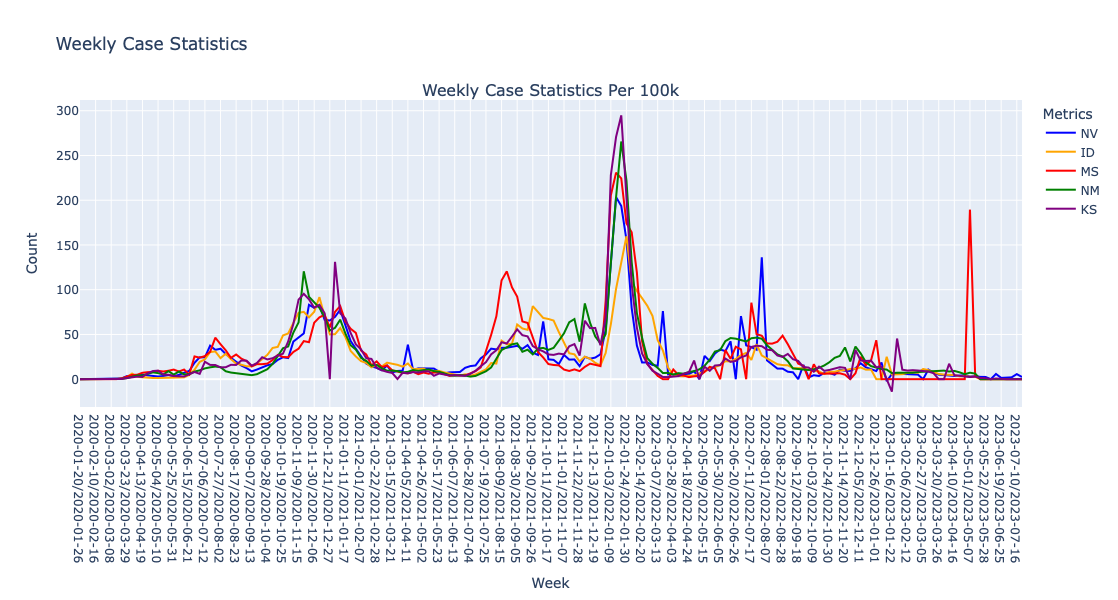

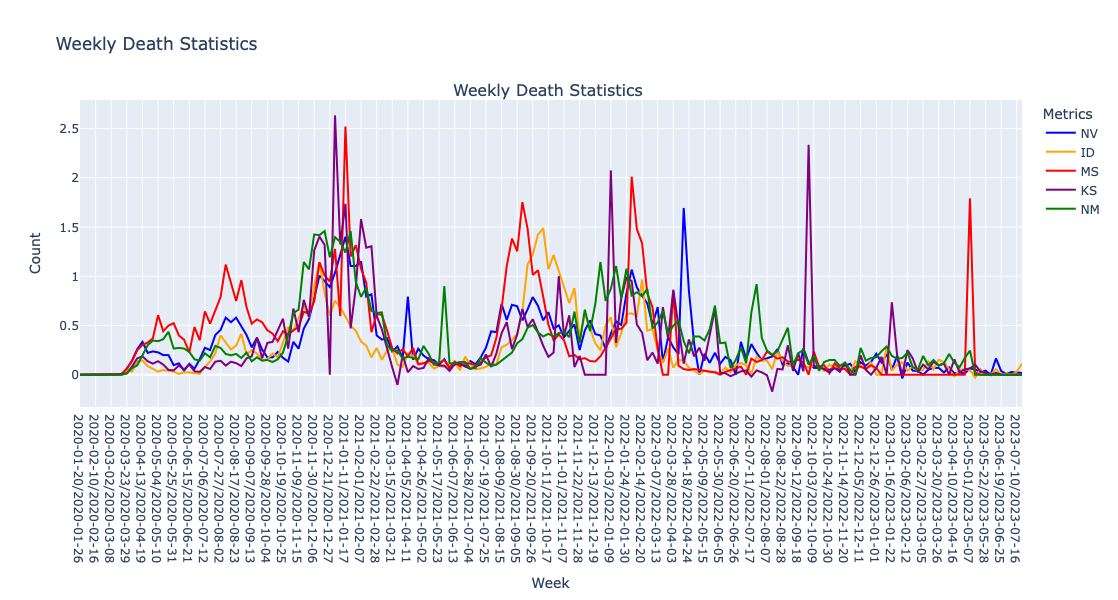

In [51]:

# Define colors for each metric
State = {
    'NV': 'blue',
    'ID': 'orange',
    'MS': 'red',
    'NM': 'green',
    'KS': 'purple',
}

# Convert 'Week' column to string for Plotly compatibility
chosen_states_stats_per_100k['Week'] = chosen_states_stats_per_100k['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Weekly Case Statistics Per 100k"])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_cases_per_100k_NV'], 
        mode='lines', 
        name='NV',
        line=dict(color=State['NV'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_cases_per_100k_ID'], 
        mode='lines', 
        name='ID',
        line=dict(color=State['ID'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_cases_per_100k_MS'], 
        mode='lines',  
        name='MS',
        line=dict(color=State['MS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_cases_per_100k_NM'], 
        mode='lines',  
        name='NM',
        line=dict(color=State['NM'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_cases_per_100k_KS'], 
        mode='lines',  
        name='KS',
        line=dict(color=State['KS'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Weekly Case Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()

# Convert 'Week' column to string for Plotly compatibility
chosen_states_stats_per_100k['Week'] =chosen_states_stats_per_100k['Week'].astype(str)

# Create a subplot figure
fig = make_subplots(rows=1, cols=1, subplot_titles=["Weekly Death Statistics "])

# Add traces for each metric
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_deaths_per_100k_NV'], 
        mode='lines', 
        name='NV',
        line=dict(color=State['NV'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_deaths_per_100k_ID'], 
        mode='lines', 
        name='ID',
        line=dict(color=State['ID'])
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_deaths_per_100k_MS'], 
        mode='lines',  
        name='MS',
        line=dict(color=State['MS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_deaths_per_100k_KS'], 
        mode='lines',  
        name='KS',
        line=dict(color=State['KS'])
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=chosen_states_stats_per_100k['Week'], 
        y=chosen_states_stats_per_100k['Mean_deaths_per_100k_NM'], 
        mode='lines',  
        name='NM',
        line=dict(color=State['NM'])
    ),
    row=1, col=1
)

# Update layout for the figure
fig.update_layout(
    title="Weekly Death Statistics",
    xaxis_title="Week",
    yaxis_title="Count",
    legend_title="Metrics",
    height=600,
    width=1000
)

# Show the figure
fig.show()